# DIVVY'IN UP DATA

    Initial steps/organization

In [1]:
# Import Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
# Import data file
divvy_df = pd.read_csv('Divvy_Trips_2019_Q3.csv')
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [3]:
divvy_df.shape

(1640718, 12)

In [4]:
# Remove null rows
divvy_df.dropna(inplace=True)
divvy_df.shape

divvy_df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,2019-09-30 23:56:27,2019-10-01 00:06:20,5690,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0
1640714,25223636,2019-09-30 23:57:02,2019-10-01 00:02:13,5079,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0
1640715,25223637,2019-09-30 23:57:45,2019-10-01 00:01:41,5535,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0
1640716,25223638,2019-09-30 23:57:47,2019-10-01 00:04:41,6120,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0


In [5]:
# Convert birthyear to age
divvy_df['age'] = (2019 - divvy_df['birthyear'])
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0


In [6]:
# Create bins for age
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create the names for the five bins
group_names = ["11-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
divvy_df["Age Group"] = pd.cut(divvy_df["age"], bins, labels=group_names, include_lowest=True)
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29


In [7]:
# Convert date columns to datetime format
divvy_df['start_time'] = pd.to_datetime(divvy_df['start_time'])
divvy_df['end_time'] = pd.to_datetime(divvy_df['end_time'])

In [8]:
# Split date from time and create columns
divvy_df['start_date'] = divvy_df['start_time'].dt.date
divvy_df['start_time'] = divvy_df['start_time'].dt.time
divvy_df['end_date'] = divvy_df['end_time'].dt.date
divvy_df['end_time'] = divvy_df['end_time'].dt.time
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group,start_date,end_date
0,23479388,00:00:27,00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29,2019-07-01,2019-07-01
5,23479393,00:02:21,00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29,2019-07-01,2019-07-01
18,23479406,00:06:51,00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29,2019-07-01,2019-07-01
20,23479408,00:08:24,00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49,2019-07-01,2019-07-01
21,23479409,00:08:40,00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29,2019-07-01,2019-07-01


In [9]:
# Organize columns in dataframe
divvy_df = divvy_df[["trip_id", "bikeid", "start_date", "start_time", "end_date", "end_time", "tripduration", "from_station_id", "from_station_name", "to_station_id", "to_station_name", "usertype", "gender", "birthyear", "age", "Age Group"]]
divvy_df.head()

,trip_id,bikeid,start_date,start_time,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,3591,2019-07-01,00:00:27,2019-07-01,00:20:41,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29
5,23479393,4941,2019-07-01,00:02:21,2019-07-01,00:07:31,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29
18,23479406,2758,2019-07-01,00:06:51,2019-07-01,00:26:22,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,24.0,20-29
20,23479408,2447,2019-07-01,00:08:24,2019-07-01,00:20:07,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,49.0,40-49
21,23479409,6336,2019-07-01,00:08:40,2019-07-01,00:27:50,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,26.0,20-29


# Bike Usage

In [10]:
# Number of unique bikes in circulation
divvy_df['bikeid'].nunique()

5783

In [11]:
# Bike IDs with most activity
divvy_df['bikeid'].value_counts()

5344    462
3770    457
717     453
5634    445
3333    443
       ... 
5098      1
6254      1
1806      1
2292      1
3310      1
Name: bikeid, Length: 5783, dtype: int64

# Most popular routes and stations

In [12]:
# Most popular starting stations
divvy_df['from_station_name'].value_counts()

Canal St & Adams St               19106
Streeter Dr & Grand Ave           18363
Clinton St & Madison St           17965
Clinton St & Washington Blvd      16068
Lake Shore Dr & North Blvd        13944
                                  ...  
South Chicago Ave & Elliot Ave        4
Racine Ave & 65th St                  3
Rhodes Ave & 71st St                  3
Racine Ave & 61st St                  1
Carpenter St & 63rd St                1
Name: from_station_name, Length: 612, dtype: int64

In [13]:
# Most popular ending stations
divvy_df['to_station_name'].value_counts()

Streeter Dr & Grand Ave         20143
Lake Shore Dr & North Blvd      18248
Clinton St & Washington Blvd    17347
Canal St & Adams St             16149
Clinton St & Madison St         15792
                                ...  
Rhodes Ave & 71st St                3
Damen Ave & 59th St                 3
Michigan Ave & 71st St              3
Vincennes Ave & 75th St             1
Racine Ave & 61st St                1
Name: to_station_name, Length: 612, dtype: int64

In [14]:
# Most popular trips *still in-progress*
popular_stations = divvy_df.groupby(['from_station_name','to_station_name'])
popular_stations

# Usertype Breakdown- Subscriber vs Customer

In [15]:
# Groupby usertype for ridership breakdown
usertype_df = divvy_df.groupby('usertype')
usertype_df.count()

,trip_id,bikeid,start_date,start_time,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,gender,birthyear,age,Age Group
usertype,,,,,,,,,,,,,,,
Customer,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214096
Subscriber,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1138932


In [16]:
#Find amount ot Subscribers and Customers
divvy_df['usertype'].value_counts()

Subscriber    1139252
Customer       214116
Name: usertype, dtype: int64

In [17]:
#Find Usertype Percentage

#Count number of trips for each usertype
count_number_usertype = divvy_df['trip_id'].nunique()

#Count number of each usertype
usertype_number = usertype_df['trip_id'].nunique()

#Percentage Usertype Calculation
percent_usertype =  usertype_number / count_number_usertype * 100

#Display usertype demographics
usertype_demographics_df = pd.DataFrame({'Total Count':usertype_number,
                                       'Percentage':percent_usertype})
usertype_demographics_df.sort_values('Total Count', ascending = False)

,Total Count,Percentage
usertype,,
Subscriber,1139252,84.179026
Customer,214116,15.820974


<u> **Usertype Observations:** </u>

*There are far more subscribers than customers who ride in the Chicago Divvy network, about 84% to 16%

# Gender Breakdown

In [18]:
#Find amount of Male and Female riders
divvy_df['gender'].value_counts()

Male      957353
Female    396015
Name: gender, dtype: int64

In [19]:
#Group by gender
usertype_gender_df = divvy_df.groupby('gender')

#Count number of trips for each gender
count_number_gender = divvy_df['trip_id'].nunique()

#Count number of each gender
gender_type_number = usertype_gender_df['trip_id'].nunique()

#Calculate percentage for gender
percent_gender =  gender_type_number / count_number_gender * 100

#Display gender demographics
gender_demographics_df = pd.DataFrame({'Total Count':gender_type_number,
                                       'Percentage':percent_gender})
gender_demographics_df.sort_values('Total Count', ascending = False)

,Total Count,Percentage
gender,,
Male,957353,70.738557
Female,396015,29.261443


Text(0.5, 1.0, 'Total Divvy Riders based on Gender')

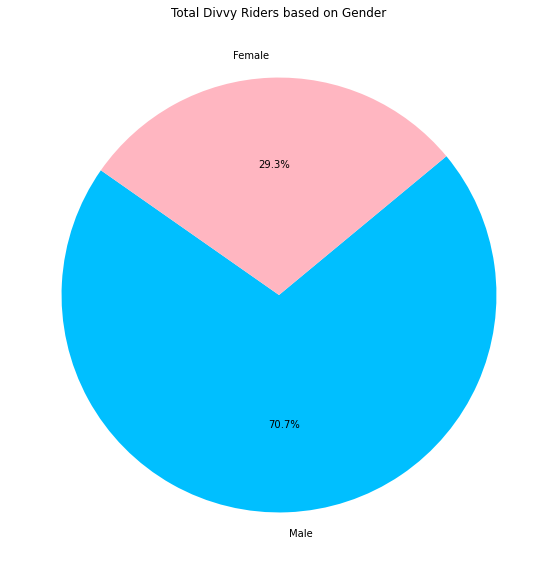

In [20]:
#Total Divvy Riders based on Gender- PIE CHART

gender_data = divvy_df['gender'].value_counts()
gender_labels = ['Male','Female']
colours = ['deepskyblue', 'lightpink']
fig, ax1 = plt.subplots(figsize = (20,10)) 
plt.pie(gender_data, labels= gender_labels, colors=colours, autopct="%1.1f%%", startangle=145)
plt.title("Total Divvy Riders based on Gender")

In [21]:
# Find breakdown of each gender for each usertype
usertype_gender_df['usertype'].value_counts()

gender  usertype  
Female  Subscriber    313303
        Customer       82712
Male    Subscriber    825949
        Customer      131404
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Total Divvy Riders based on Gender and Usertype')

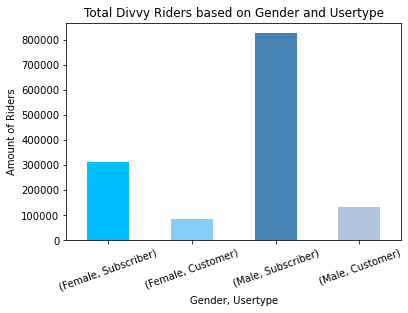

In [22]:
#Total Divvy Riders based on Gender and Usertype- Bar Graph

split_gender_data = usertype_gender_df['usertype'].value_counts()
blue_colors = ["deepskyblue", "lightskyblue", "steelblue", "lightsteelblue"]
gender_chart = split_gender_data.plot(kind = 'bar', color = blue_colors, rot = 20)
gender_chart.set_ylabel("Amount of Riders")
gender_chart.set_xlabel("Gender, Usertype")
gender_chart.set_title("Total Divvy Riders based on Gender and Usertype")

Text(0.5, 1.0, 'Total Divvy Riders based on Gender and Usertype')

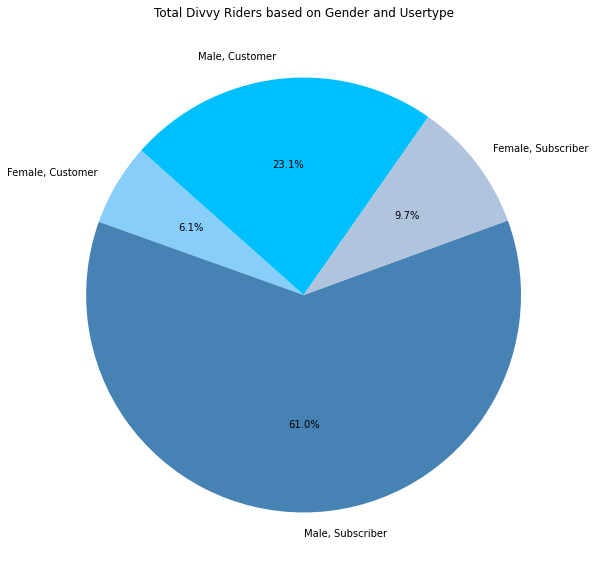

In [23]:
#Total Divvy Riders based on Gender and Usertype- Pie Chart

gender_by_usertype = usertype_gender_df['usertype'].value_counts()
gender_usertype_labels= ["Male, Customer", "Female, Customer", "Male, Subscriber", "Female, Subscriber"]
fig, ax1 = plt.subplots(figsize = (20,10)) 
plt.pie(gender_by_usertype, labels = gender_usertype_labels, colors= blue_colors, autopct="%1.1f%%", startangle=55)
plt.title("Total Divvy Riders based on Gender and Usertype")

Text(0.5, 1.0, 'Divvy Riders based on Gender- Customers Only')

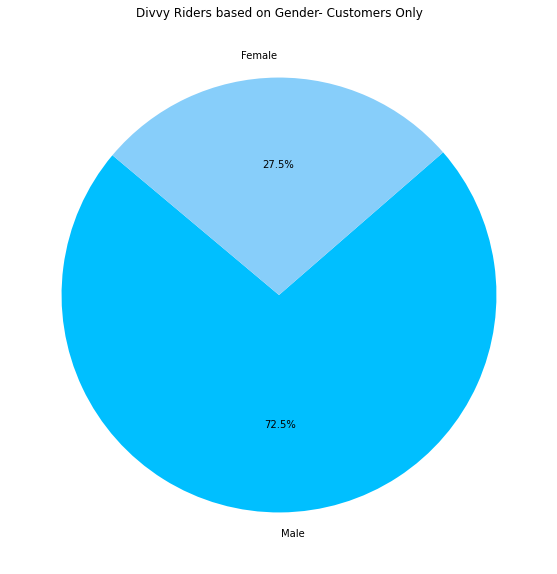

In [24]:
#Divvy Riders based on Gender- Customers Only

sizes = [825949,313303]
skyblue_colors = ["deepskyblue", "lightskyblue"]
fig, ax1 = plt.subplots(figsize = (20,10)) 
plt.pie(sizes, labels= gender_labels, colors=skyblue_colors, autopct="%1.1f%%", startangle=140)
plt.title("Divvy Riders based on Gender- Customers Only")

Text(0.5, 1.0, 'Divvy Riders based on Gender- Subscribers Only')

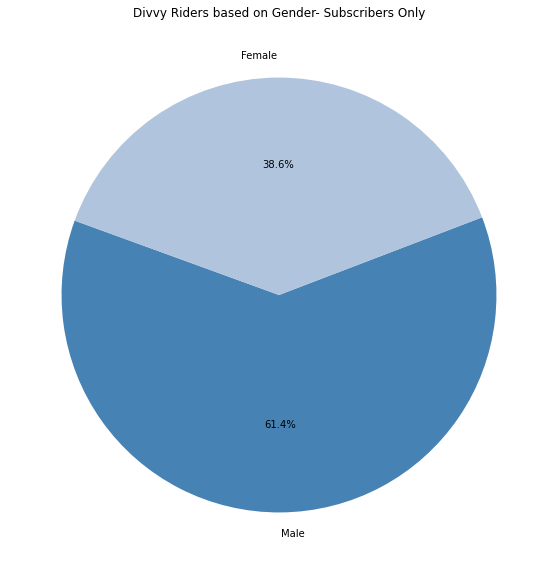

In [25]:
#Divvy Riders based on Gender- Subscribers Only

sizes = [131404,82712]
steel_colors = ["steelblue", "lightsteelblue"]
fig, ax1 = plt.subplots(figsize = (20,10)) 
plt.pie(sizes, labels= gender_labels, colors=steel_colors, autopct="%1.1f%%", startangle=160)
plt.title("Divvy Riders based on Gender- Subscribers Only")

<u> **Gender Observations:** </u>

*There are far more male Divvy riders than female - about 70% to 30%.

*It is fairly the same gender breakdown when it comes to customer (about 70/30) and subscriber ( about 60/40).

# Age Breakdown

In [26]:
#Count number of trips for each age group
count_number_age = divvy_df['trip_id'].nunique()

#Count number in each age group and display
usertype_age_df = divvy_df.groupby('Age Group')
age_type_number = usertype_age_df['trip_id'].nunique()
usertype_age_df.count()

,trip_id,bikeid,start_date,start_time,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
Age Group,,,,,,,,,,,,,,,
11-19,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148,24148
20-29,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811,633811
30-39,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889,402889
40-49,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754,151754
50-59,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465,106465
60-69,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272,31272
70-79,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
80-89,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [27]:
#Calculate percentage for age
percent_age =  age_type_number / count_number_age * 100

#Make df of age demographics
age_demographics_df = pd.DataFrame({'Total Count':age_type_number,
                                       'Percentage of Age':percent_age})
age_demographics_df.sort_values('Age Group', ascending = True)

,Total Count,Percentage of Age
Age Group,,
11-19,24148,1.784289
20-29,633811,46.832125
30-39,402889,29.769361
40-49,151754,11.213063
50-59,106465,7.866670
60-69,31272,2.310680
70-79,2656,0.196251
80-89,33,0.002438


Text(0.5, 1.0, 'Total Divvy Riders based on Age')

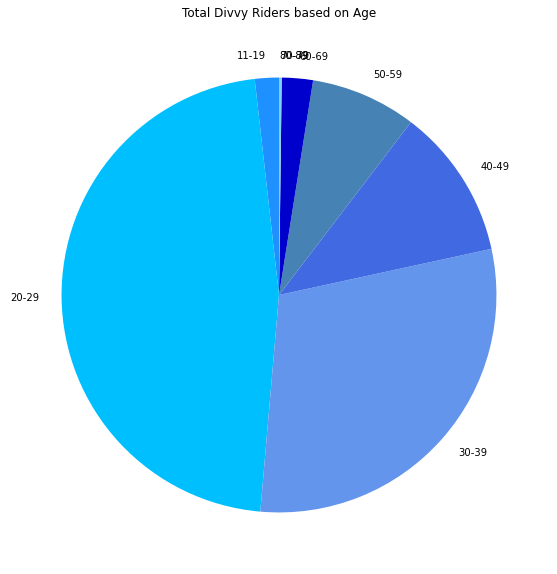

In [28]:
#Total Divvy Riders based on Age- Pie Chart

rainbow_colors = ["dodgerblue", "deepskyblue", "cornflowerblue", "royalblue", "steelblue", "mediumblue", "skyblue", "navy"]
fig, ax1 = plt.subplots(figsize = (20,10)) 
plt.pie(percent_age, labels= group_names, colors=rainbow_colors, startangle=90)
plt.title("Total Divvy Riders based on Age")

Text(0.5, 1.0, 'Total Divvy Riders Based on Age')

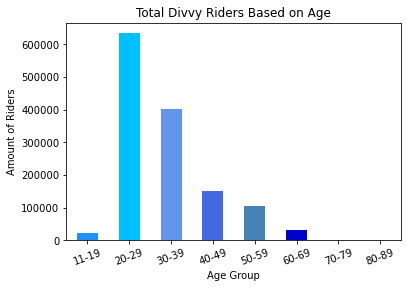

In [29]:
#Total Divvy Riders based on Age- Bar Chart

age_chart = age_type_number.plot(kind = 'bar', color = rainbow_colors, rot = 20)
age_chart.set_ylabel("Amount of Riders")
age_chart.set_xlabel("Age Group")
age_chart.set_title("Total Divvy Riders Based on Age")

Text(0.5, 1.0, 'Percentage Divvy Riders Based on Age')

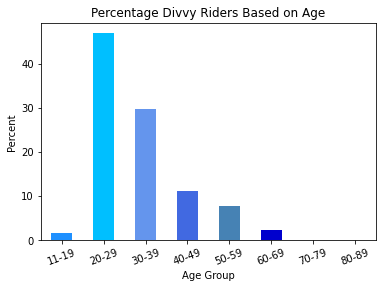

In [30]:
#Percentage Divvy Riders based on Age- Bar Chart

percent_chart = percent_age.plot(kind = 'bar', color = rainbow_colors, rot = 20)
percent_chart.set_ylabel("Percent")
percent_chart.set_xlabel("Age Group")
percent_chart.set_title("Percentage Divvy Riders Based on Age")

In [31]:
#Age seperated by usertype
usertype_age_df['usertype'].value_counts()

Age Group  usertype  
11-19      Subscriber     12093
           Customer       12055
20-29      Subscriber    512720
           Customer      121091
30-39      Subscriber    355281
           Customer       47608
40-49      Subscriber    132359
           Customer       19395
50-59      Subscriber     94713
           Customer       11752
60-69      Subscriber     29201
           Customer        2071
70-79      Subscriber      2535
           Customer         121
80-89      Subscriber        30
           Customer           3
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Divvy Riders based on Age, Customers Only')

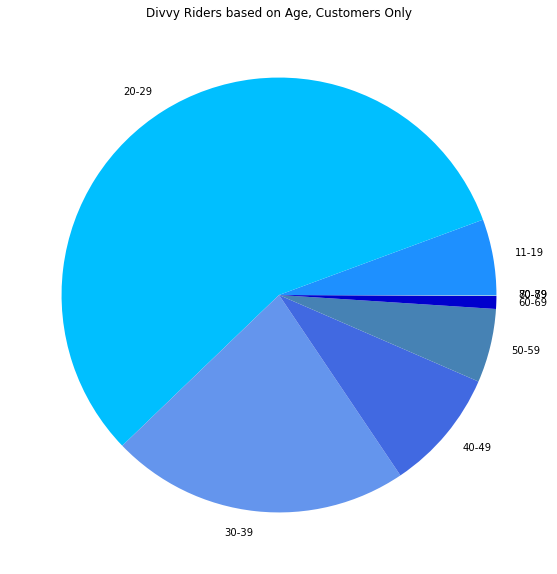

In [32]:
#Divvy Riders based on Age, Customers Only- PIE CHART

customer_age_totals = [12055,121091,47608,19395,11752,2071,121,3]
fig, ax1 = plt.subplots(figsize = (20,10)) 
plt.pie(customer_age_totals, labels= group_names, colors=rainbow_colors)
#autopct="%1.1f%%"
#startangle=90
plt.title("Divvy Riders based on Age, Customers Only")

Text(0.5, 1.0, 'Divvy Riders based on Age, Subscribers Only')

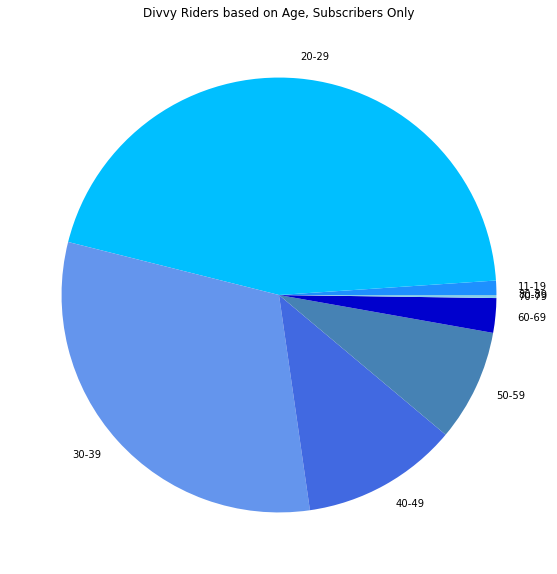

In [33]:
# Divvy Riders based on Age, Subscribers Only- PIE CHART

subscriber_age_totals = [12093,512720,355281,132359,94713,29201,2535,30]
fig, ax1 = plt.subplots(figsize = (20,10)) 
plt.pie(subscriber_age_totals, labels= group_names, colors = rainbow_colors)
#startangle=90
#autopct="%1.1f%%",
plt.title("Divvy Riders based on Age, Subscribers Only")

Text(0, 0.5, 'Amount of Riders')

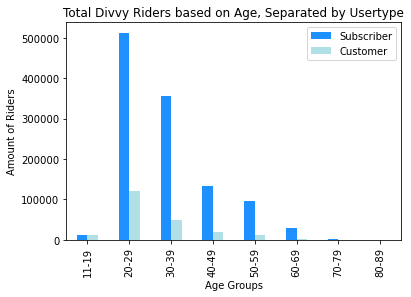

In [34]:
#Total Divvy Riders based on Age, Separated by Usertype- Histogram

plotdata = pd.DataFrame({
    "Subscriber":subscriber_age_totals,
    "Customer":customer_age_totals
    }, 
    index= group_names
    )
plotdata.plot(kind="bar", color = ['dodgerblue','powderblue'])
plt.title("Total Divvy Riders based on Age, Separated by Usertype")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

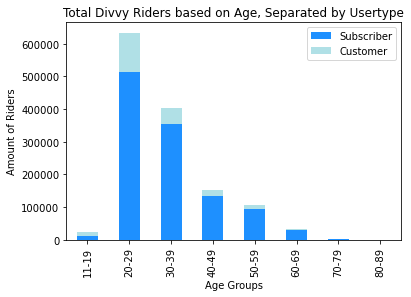

In [35]:
#Total Divvy Riders based on Age, Separated by Usertype- Stacked Histogram

plotdata[["Subscriber", "Customer"]].plot(kind="bar", color=['dodgerblue','powderblue'], stacked=True)
plt.title("Total Divvy Riders based on Age, Separated by Usertype")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

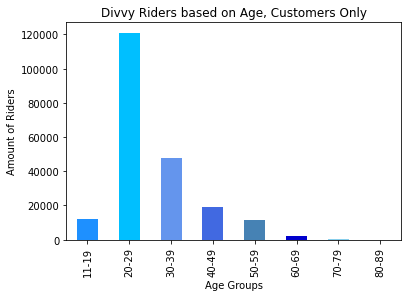

In [36]:
#Divvy Riders based on Age, Customers Only- BAR CHART

plotdata['Customer'].plot(kind="bar", color=rainbow_colors, title="test")
plt.title("Divvy Riders based on Age, Customers Only")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

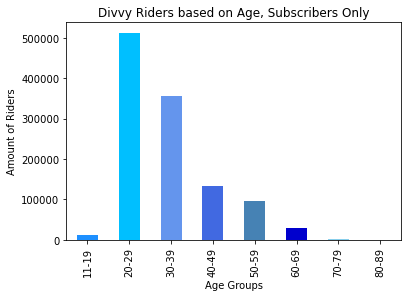

In [37]:
#Divvy Riders based on Age, Subscribers Only- BAR CHART

plotdata['Subscriber'].plot(kind="bar", color=rainbow_colors, title="test")
plt.title("Divvy Riders based on Age, Subscribers Only")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

<u> **Age Observations:** </u>

*Age Group 20-29 has the highest amount of riders, with about 47% of all riders. Age Group 30-39 comes in second with almost 30%.

*It is a pretty standard breakdown of ages, as we expected. The distribution is fairly the same with customers only and subscribers only. 